# Project : Sentiment Analysis on Social Media about US Airlines

### Subject: US Airlines

In [1]:
# Let's import some libraries

import pandas as pd
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import html
import nltk
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from nrclex import NRCLex
from collections import Counter
from math import log10
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import calendar
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

C:\Users\rafae\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('tweets_airline.csv', low_memory=False, encoding='ISO-8859-1')
df

tweet_created            tweet_id         airline             name  \
0        24/02/2015  570306133677760513  Virgin America          cairdin   
1        24/02/2015  570301130888122368  Virgin America         jnardino   
2        24/02/2015  570301083672813571  Virgin America       yvonnalynn   
3        24/02/2015  570301031407624196  Virgin America         jnardino   
4        24/02/2015  570300817074462722  Virgin America         jnardino   
...             ...                 ...             ...              ...   
14635    22/02/2015  569587686496825344        American  KristenReenders   
14636    22/02/2015  569587371693355008        American         itsropes   
14637    22/02/2015  569587242672398336        American         sanyabun   
14638    22/02/2015  569587188687634433        American       SraJackson   
14639    22/02/2015  569587140490866689        American        daviddtwu   

                                                    text  
0                    @VirginAmerica What @dhepburn said.  
1      @VirginAmerica plus you've added commercials t...  
2      @VirginAmerica I didn't today... Must mean I n...  
3      @VirginAmerica it's really aggressive to blast...  
4      @VirginAmerica and it's a really big bad thing...  
...                                                  ...  
14635  @AmericanAir thank you we got on a different f...  
14636  @AmericanAir leaving over 20 minutes Late Flig...  
14637  @AmericanAir Please bring American Airlines to...  
14638  @AmericanAir you have my money, you change my ...  
14639  @AmericanAir we have 8 ppl so we need 2 know h...  

[14640 rows x 5 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_created  14640 non-null  object
 1   tweet_id       14640 non-null  int64 
 2   airline        14640 non-null  object
 3   name           14640 non-null  object
 4   text           14640 non-null  object
dtypes: int64(1), object(4)
memory usage: 572.0+ KB


In [4]:
df.shape

(14640, 5)

In [5]:
df.drop(['name'], axis=1, inplace=True)

In [6]:
# Checking the misses values

df.isnull().sum()/df.shape[0]*100

tweet_created    0.0
tweet_id         0.0
airline          0.0
text             0.0
dtype: float64

In [7]:
# Calculate the count of each item in the "source" column.

airline_counts = df['airline'].value_counts()

# Calculate the percentage of each item.
airline_percentages = (airline_counts / airline_counts.sum()) * 100

# Display the results.

print(airline_percentages)

United            26.106557
US Airways        19.897541
American          18.845628
Southwest         16.530055
Delta             15.177596
Virgin America     3.442623
Name: airline, dtype: float64


In [8]:
# calling SentimentIntensityAnalyzer object

analyser = SentimentIntensityAnalyzer()

# Using polarity scores for knowing the polarity of each text

def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [9]:
# Applying scores and compound 

df['scores'] = df['text'].apply(lambda review: analyser.polarity_scores(review))

# Applying compound

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

# Applying Sentiment

def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')

df.head()

tweet_created            tweet_id         airline  \
0    24/02/2015  570306133677760513  Virgin America   
1    24/02/2015  570301130888122368  Virgin America   
2    24/02/2015  570301083672813571  Virgin America   
3    24/02/2015  570301031407624196  Virgin America   
4    24/02/2015  570300817074462722  Virgin America   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                              scores  compound Sentiment  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive  
3  {'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'co...   -0.2716  negative  
4  {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...   -0.5829  negative

In [10]:
for col in df.columns:
    print("The number of null values - ", col, df[col].isnull().sum())   

#prints the number of null values in each column


df["text"]= df["text"].str.lower()             #converts every value in the column to lowercase

df.head()

The number of null values -  tweet_created 0
The number of null values -  tweet_id 0
The number of null values -  airline 0
The number of null values -  text 0
The number of null values -  scores 0
The number of null values -  compound 0
The number of null values -  Sentiment 0


tweet_created            tweet_id         airline  \
0    24/02/2015  570306133677760513  Virgin America   
1    24/02/2015  570301130888122368  Virgin America   
2    24/02/2015  570301083672813571  Virgin America   
3    24/02/2015  570301031407624196  Virgin America   
4    24/02/2015  570300817074462722  Virgin America   

                                                text  \
0                @virginamerica what @dhepburn said.   
1  @virginamerica plus you've added commercials t...   
2  @virginamerica i didn't today... must mean i n...   
3  @virginamerica it's really aggressive to blast...   
4  @virginamerica and it's a really big bad thing...   

                                              scores  compound Sentiment  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive  
3  {'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'co...   -0.2716  negative  
4  {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...   -0.5829  negative

In [11]:
def cleaning(df):
    clean = re.sub('<.*?>', ' ', str(df))            
#removes HTML tags
    clean = re.sub('\'.*?\s',' ', clean)               
#removes all hanging letters afer apostrophes (s in it's)
    clean = re.sub(r'http\S+',' ', clean)              
#removes URLs
    clean = re.sub('\W+',' ', clean)                   
#replacing the non alphanumeric characters
    return html.unescape(clean)
df['cleaned'] = df['text'].apply(cleaning)

def tokenizing(df):
    tweet = df['cleaned']                            
#tokenizing is done
    tokens = nltk.word_tokenize(tweet)
    return tokens
df['tokens'] = df.apply(tokenizing, axis=1)

stop_words = set(stopwords.words('english'))
def remove_stops(df):
    my_list = df['tokens']
    meaningful_words = [w for w in my_list if not w in stop_words]           #stopwords are removed from the tokenized data
    return (meaningful_words)
df['tokens'] = df.apply(remove_stops, axis=1)


lemmatizer = WordNetLemmatizer()
def lemmatizing(df):
    my_list = df['tokens']
    lemmatized_list = [lemmatizer.lemmatize(word) for word in my_list]    
#lemmatizing is performed. It's more efficient than stemming.
    return (lemmatized_list)
df['tokens'] = df.apply(lemmatizing, axis=1)

df.head()

tweet_created            tweet_id         airline  \
0    24/02/2015  570306133677760513  Virgin America   
1    24/02/2015  570301130888122368  Virgin America   
2    24/02/2015  570301083672813571  Virgin America   
3    24/02/2015  570301031407624196  Virgin America   
4    24/02/2015  570300817074462722  Virgin America   

                                                text  \
0                @virginamerica what @dhepburn said.   
1  @virginamerica plus you've added commercials t...   
2  @virginamerica i didn't today... must mean i n...   
3  @virginamerica it's really aggressive to blast...   
4  @virginamerica and it's a really big bad thing...   

                                              scores  compound Sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
3  {'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'co...   -0.2716  negative   
4  {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...   -0.5829  negative   

                                             cleaned  \
0                  virginamerica what dhepburn said    
1   virginamerica plus you added commercials to t...   
2   virginamerica i didn today must mean i need t...   
3   virginamerica it really aggressive to blast o...   
4   virginamerica and it a really big bad thing a...   

                                              tokens  
0                    [virginamerica, dhepburn, said]  
1  [virginamerica, plus, added, commercial, exper...  
2  [virginamerica, today, must, mean, need, take,...  
3  [virginamerica, really, aggressive, blast, obn...  
4           [virginamerica, really, big, bad, thing]

In [12]:
df.shape[0]

14640

In [13]:
# Define the function to tokenize sentences
def sents(text):
    clean = re.sub('<.*?>', ' ', str(text))
    clean = re.sub('\'.*?\s', ' ', clean)
    clean = re.sub(r'http\S+', ' ', clean)
    clean = re.sub('[^a-zA-Z0-9\.]+', ' ', clean)
    tokens = nltk.sent_tokenize(clean)
    return tokens

# Apply the sentence tokenization function to the 'cleaned' column
df['sentences'] = df['cleaned'].apply(sents)

# Calculate the number of sentences
length_s = df['sentences'].apply(len).sum()
print("The number of sentences is -", length_s)

# Calculate the number of tokens
length_t = df['tokens'].apply(len).sum()
print("\nThe number of tokens is -", length_t)

# Calculate the average number of tokens per sentence
average_tokens = round(length_t / length_s)
print("\nThe average number of tokens per sentence is -", average_tokens)

# Calculate the proportion of positive and negative sentiments
positive = (df['Sentiment'] == 'positive').sum()
negative = (df['Sentiment'] == 'negative').sum()
print("\nThe number of positive examples is -", positive)
print("\nThe number of negative examples is -", negative)
print("\nThe proportion of positive to negative sentiments is -", positive / negative)

The number of sentences is - 14640

The number of tokens is - 151330

The average number of tokens per sentence is - 10

The number of positive examples is - 10109

The number of negative examples is - 4531

The proportion of positive to negative sentiments is - 2.2310748179209887


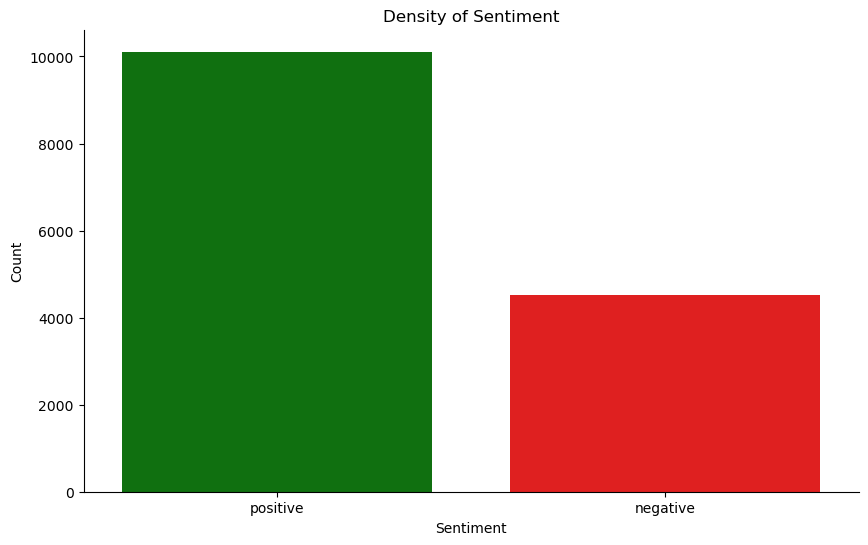

In [14]:
# Define a custom color palette for different sentiment categories
custom_palette = {"positive": "green", "negative": "red", "neutral": "blue"}

# Create a countplot to visualize the density of sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', palette=custom_palette)

# Add labels and a title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Density of Sentiment")

# Customize the appearance
sns.despine()

# Show the plot
plt.show()

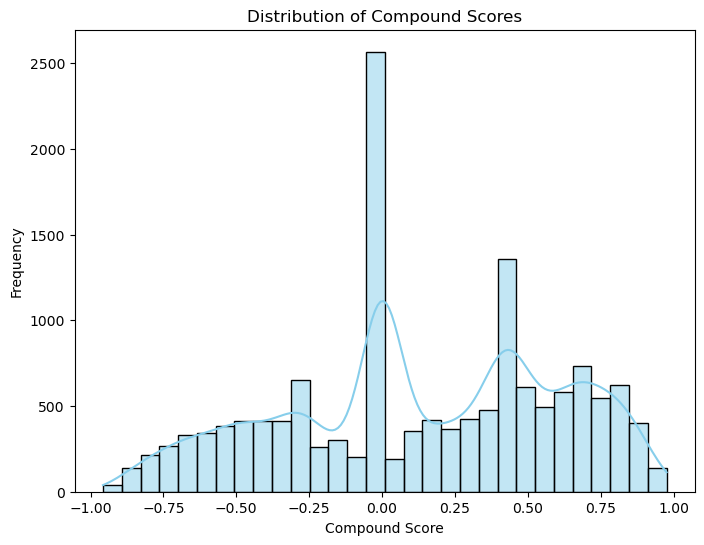

In [15]:
# Histogram of compounds

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='compound', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

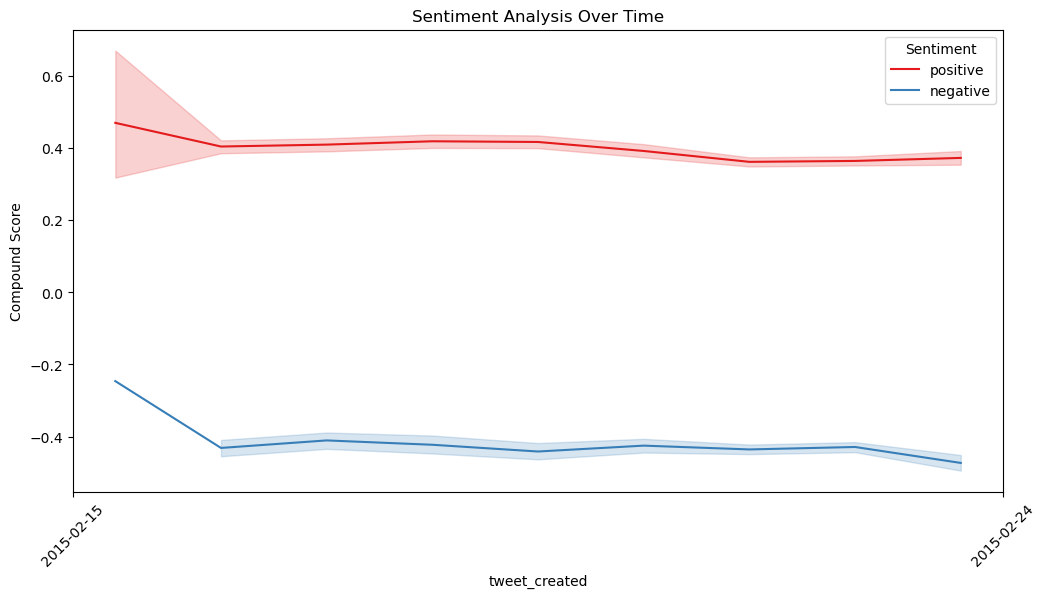

In [19]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='tweet_created', y='compound', hue='Sentiment', palette='Set1')
plt.title('Sentiment Analysis Over Time')
plt.xlabel('tweet_created')
plt.ylabel('Compound Score')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.show()


In [20]:
# Table with count words for sentiment

var1 = df.groupby('Sentiment').count()['cleaned'].reset_index().sort_values(by='cleaned',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

In [21]:
# Define a custom color palette for sentiments
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Create a pie chart with Plotly Express
fig = px.pie(
    df,
    names='Sentiment',
    title='Distribution of Sentiments in Tweets',
    color_discrete_sequence=colors,  # Apply custom colors
    labels={'Sentiment': 'Sentiment Type'},  # Customize label
    hole=0.4,  # Create a donut chart with a hole in the center
    template='plotly_dark',  # Apply a dark template for a sleek look
)

# Add annotations to display the percentage of each sentiment
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1], textfont_size=14)

# Customize the layout
fig.update_layout(
    legend=dict(title=None, orientation='v', x=0.85, y=0.5),  # Adjust legend position
    margin=dict(t=100, b=50, l=50, r=50),  # Add margin for better spacing
)

# Show the pie chart
fig.show()

In [23]:
# Getting emotions using NCR Emotion lexicon

def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['cleaned'].apply(emotion)

df.head()

tweet_created            tweet_id         airline  \
0    2015-02-24  570306133677760513  Virgin America   
1    2015-02-24  570301130888122368  Virgin America   
2    2015-02-24  570301083672813571  Virgin America   
3    2015-02-24  570301031407624196  Virgin America   
4    2015-02-24  570300817074462722  Virgin America   

                                                text  \
0                @virginamerica what @dhepburn said.   
1  @virginamerica plus you've added commercials t...   
2  @virginamerica i didn't today... must mean i n...   
3  @virginamerica it's really aggressive to blast...   
4  @virginamerica and it's a really big bad thing...   

                                              scores  compound Sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
3  {'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'co...   -0.2716  negative   
4  {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...   -0.5829  negative   

                                             cleaned  \
0                  virginamerica what dhepburn said    
1   virginamerica plus you added commercials to t...   
2   virginamerica i didn today must mean i need t...   
3   virginamerica it really aggressive to blast o...   
4   virginamerica and it a really big bad thing a...   

                                              tokens  \
0              [virginamerica, what, dhepburn, said]   
1  [virginamerica, plus, you, added, commercials,...   
2  [virginamerica, i, didn, today, must, mean, i,...   
3  [virginamerica, it, really, aggressive, to, bl...   
4  [virginamerica, and, it, a, really, big, bad, ...   

                                           sentences     Emotion  
0                [ virginamerica what dhepburn said]  No emotion  
1  [ virginamerica plus you added commercials to ...  No emotion  
2  [ virginamerica i didn today must mean i need ...    surprise  
3  [ virginamerica it really aggressive to blast ...       anger  
4  [ virginamerica and it a really big bad thing ...        fear

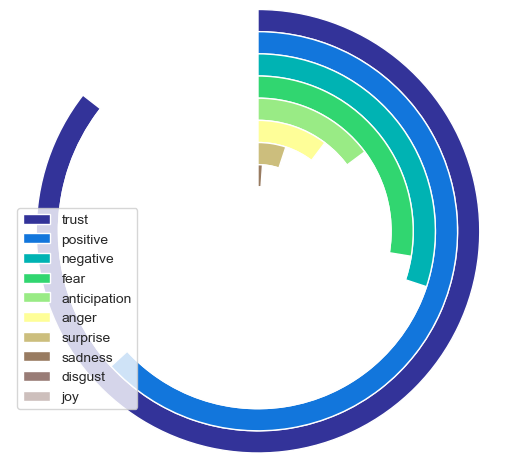

In [24]:
df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()

#number of data points
n = len(data)

#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5

#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, 
                          labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

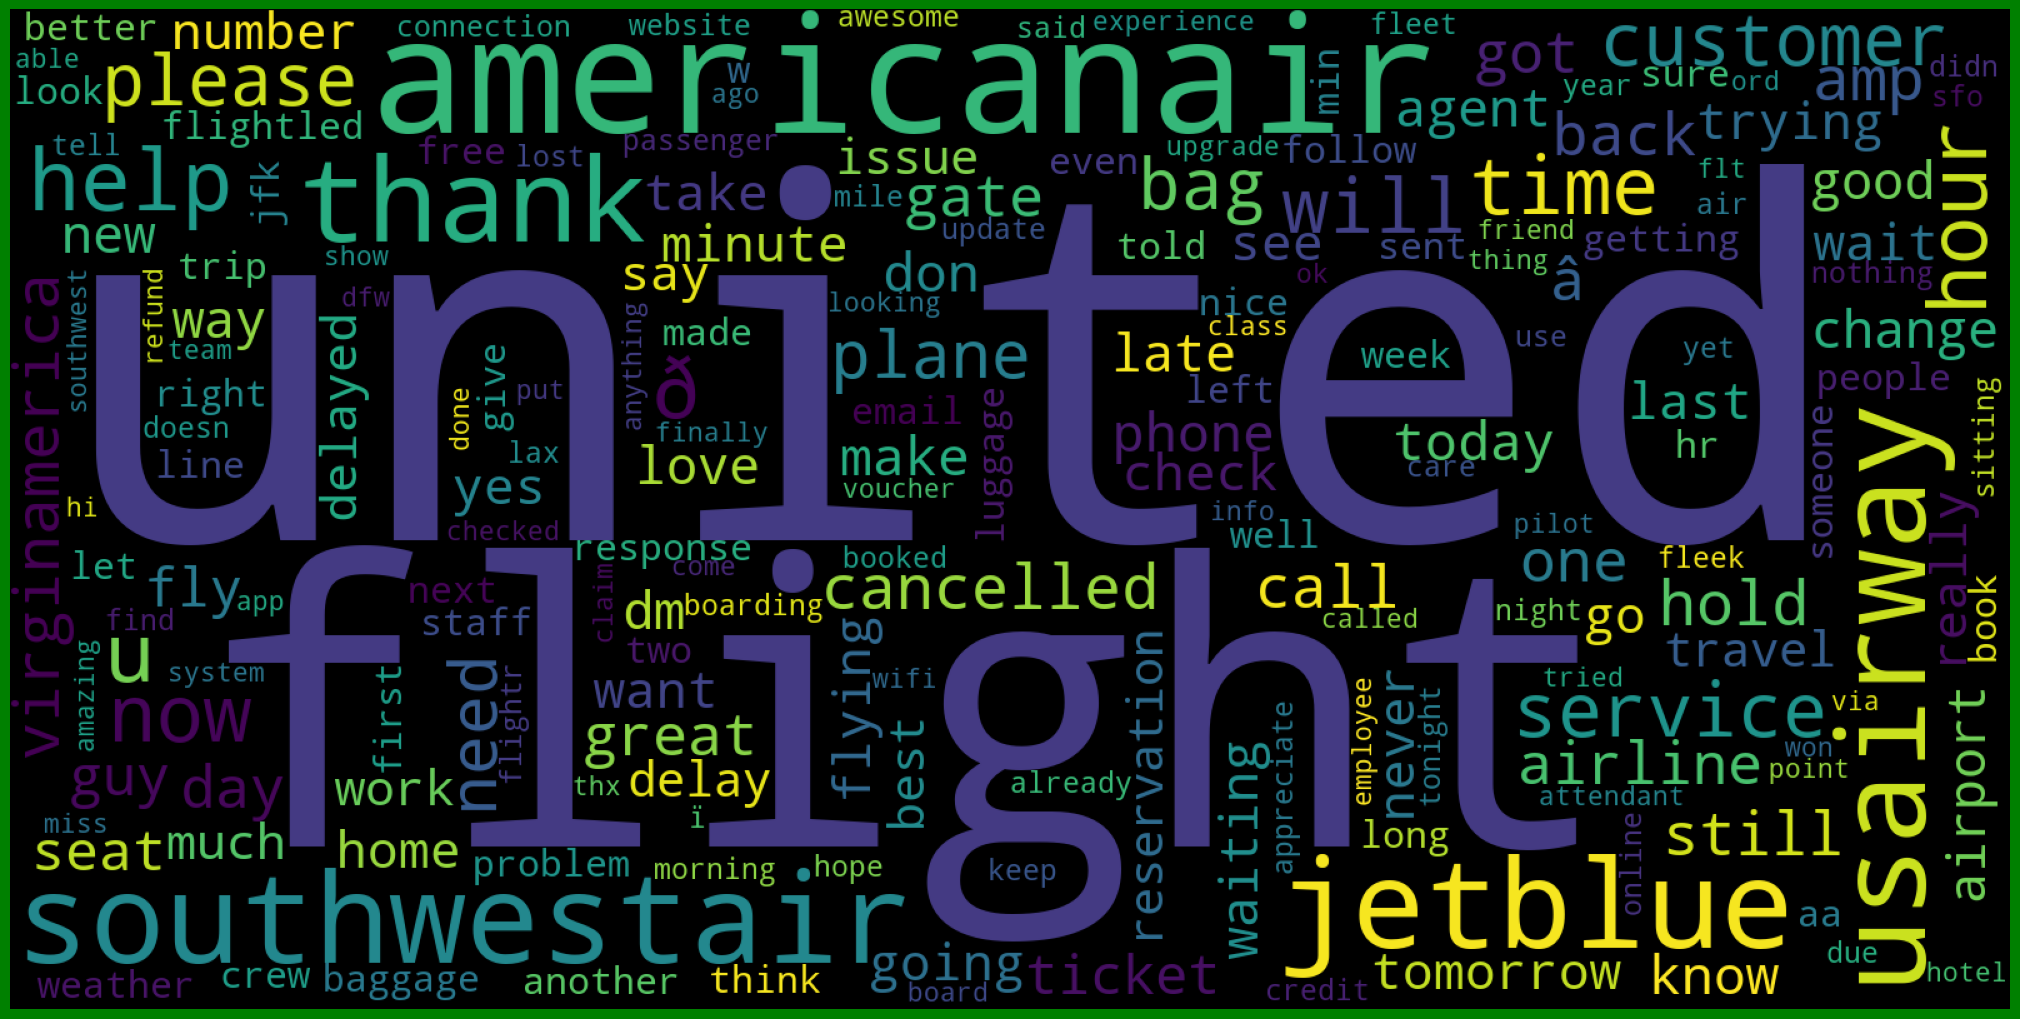

In [25]:
# Getting a positive wordcloud

comment_words = '' 
  
df_positive = df[df["Sentiment"]== "positive"] 

# iterate through the csv file 
for val in df_positive.cleaned: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1600, height = 800, 
                      min_font_size = 10, collocations=False).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

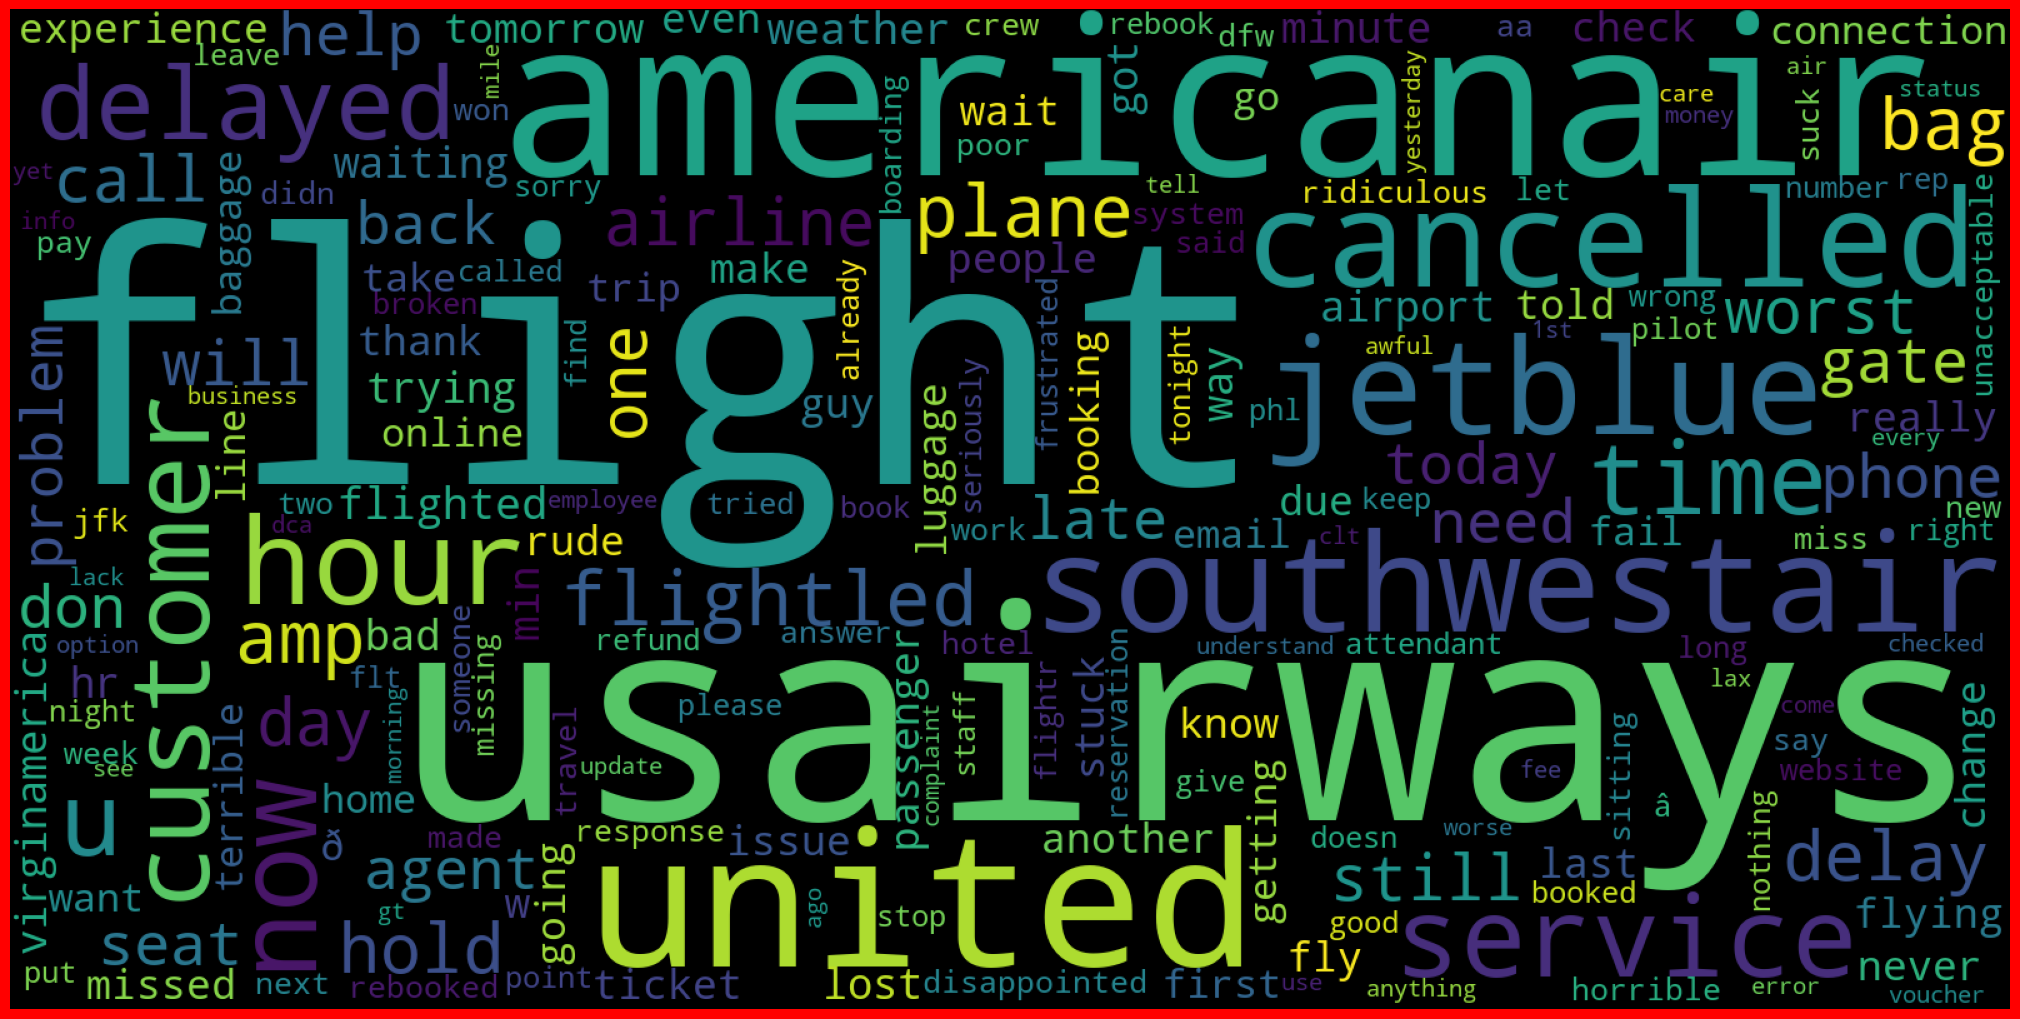

In [26]:
# Getting a negative wordcloud

comment_words = '' 
  
df_negative = df[df["Sentiment"]== "negative"] 

# iterate through the csv file 

for val in df_negative.cleaned: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1600, height = 800, 
                min_font_size = 10, collocations=False).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

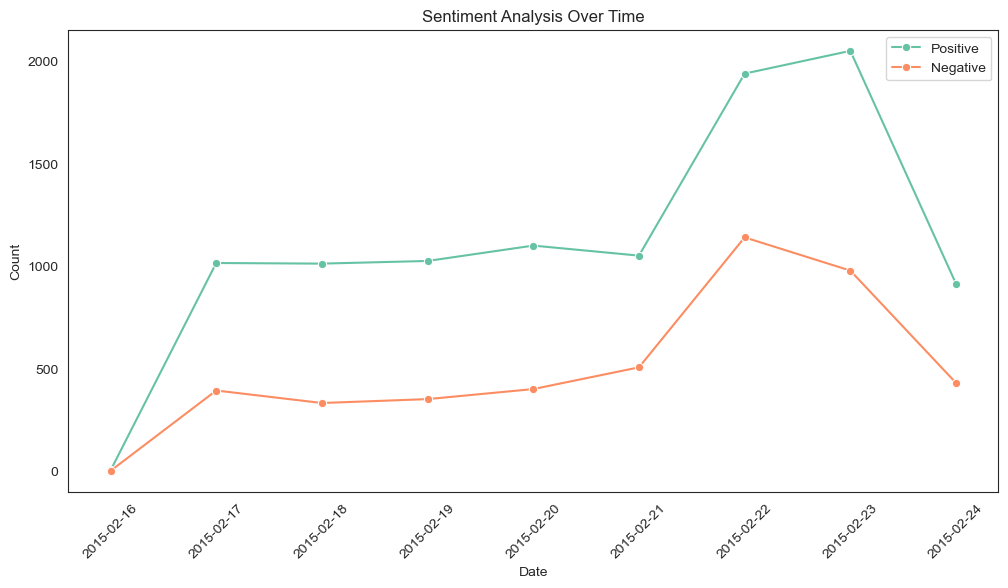

In [27]:
# Time series of Sentiment

# Convert the 'date' column to datetime format
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Group by date and sentiment, and count the number of entries
sentiment_over_time = df[df['Sentiment'].isin(['positive', 'negative'])].groupby(['tweet_created', 'Sentiment']).size().unstack(fill_value=0)

# Create a time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_over_time, x=sentiment_over_time.index, y='positive', label='Positive', marker='o')
sns.lineplot(data=sentiment_over_time, x=sentiment_over_time.index, y='negative', label='Negative', marker='o')

# Add labels and a title
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Sentiment Analysis Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_24396\190743368.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



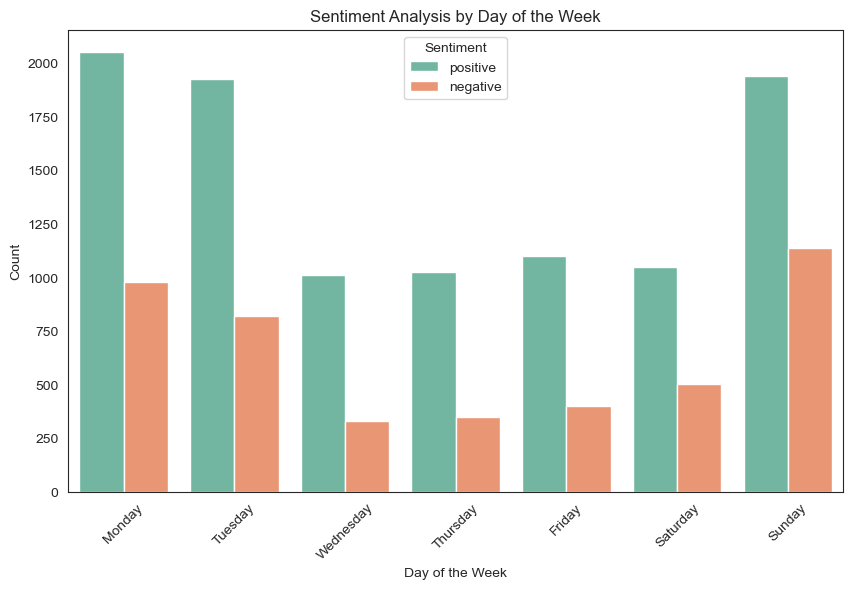

In [28]:
# Daily or weekly analysis

# Extract day of the week and week of the year
df['day_of_week'] = df['tweet_created'].dt.day_name()
df['week_of_year'] = df['tweet_created'].dt.week

# Create a bar plot showing sentiment distribution by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='Sentiment', palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sentiment Analysis by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


# Model Naive Bayes

In [30]:
# Split the data into training and test sets

X = df['cleaned']  # source (text)
y = df['Sentiment']  # label (sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Vectorize the texts using word count (or TF-IDF, if you prefer)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [32]:
# Initialize and train the Naive Bayes model

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [33]:
# Make predictions on the test dataset

y_pred = nb_model.predict(X_test_vec)

In [34]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.81


In [35]:
# Display a classification report

print('\n"Classification Report:')
print(classification_report(y_test, y_pred))


"Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.61      0.67       928
    positive       0.83      0.90      0.87      2000

    accuracy                           0.81      2928
   macro avg       0.79      0.76      0.77      2928
weighted avg       0.80      0.81      0.80      2928



In [36]:
# Display a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[ 567  361]
 [ 197 1803]]


In [37]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall (Sensitivity): {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.80
Recall (Sensitivity): 0.81
F1-Score: 0.80


In [38]:
print("Naive Bayes Model - Prediction:")
print(y_pred)

Naive Bayes Model - Prediction:
['positive' 'negative' 'negative' ... 'negative' 'positive' 'positive']


# Neural Network - Long Short Term Memory

In [40]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [42]:
# Copy the DataFrame df to another DataFrame called df_copy using the assignment operator.

df_copy = df
df_copy.head()

tweet_created            tweet_id         airline  \
0    2015-02-24  570306133677760513  Virgin America   
1    2015-02-24  570301130888122368  Virgin America   
2    2015-02-24  570301083672813571  Virgin America   
3    2015-02-24  570301031407624196  Virgin America   
4    2015-02-24  570300817074462722  Virgin America   

                                                text  \
0                @virginamerica what @dhepburn said.   
1  @virginamerica plus you've added commercials t...   
2  @virginamerica i didn't today... must mean i n...   
3  @virginamerica it's really aggressive to blast...   
4  @virginamerica and it's a really big bad thing...   

                                              scores  compound Sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  positive   
3  {'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'co...   -0.2716  negative   
4  {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...   -0.5829  negative   

                                             cleaned  \
0                  virginamerica what dhepburn said    
1   virginamerica plus you added commercials to t...   
2   virginamerica i didn today must mean i need t...   
3   virginamerica it really aggressive to blast o...   
4   virginamerica and it a really big bad thing a...   

                                              tokens  \
0              [virginamerica, what, dhepburn, said]   
1  [virginamerica, plus, you, added, commercials,...   
2  [virginamerica, i, didn, today, must, mean, i,...   
3  [virginamerica, it, really, aggressive, to, bl...   
4  [virginamerica, and, it, a, really, big, bad, ...   

                                           sentences     Emotion day_of_week  \
0                [ virginamerica what dhepburn said]  No emotion     Tuesday   
1  [ virginamerica plus you added commercials to ...  No emotion     Tuesday   
2  [ virginamerica i didn today must mean i need ...    surprise     Tuesday   
3  [ virginamerica it really aggressive to blast ...       anger     Tuesday   
4  [ virginamerica and it a really big bad thing ...        fear     Tuesday   

   week_of_year  month  
0             9      2  
1             9      2  
2             9      2  
3             9      2  
4             9      2

In [43]:
from sklearn.preprocessing import LabelEncoder

#Data Preprocessing
#You'll need to preprocess the text columns (e.g., 'cleaned') before using them in the neural network.
#Convert 'Sentiment' into numeric labels using LabelEncoder.

label_encoder = LabelEncoder()

df_copy['Sentiment'] = label_encoder.fit_transform(df_copy['Sentiment'])

In [44]:
# Tokenize and convert the texts into numeric sequences.

max_words = 10000 # Maximum number of words in the vocabulary
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df_copy['cleaned'])
X = tokenizer.texts_to_sequences(df_copy['cleaned'])
X = pad_sequences(X)

In [45]:
# Random sample of size, for example, 30% of the data

sample_fraction = 0.3
df_sample = df_copy.sample(frac=sample_fraction, random_state=42)

In [46]:
# Data preprocessing
# Convert 'Sentiment' into numeric labels using LabelEncoder

label_encoder = LabelEncoder()
df_sample['Sentiment'] = label_encoder.fit_transform(df_sample['Sentiment'])

In [48]:
# Tokenize and convert the texts into numeric sequences

max_words = 10000  #Maximum number of words in the vocabulary
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df_sample['cleaned'])
X = tokenizer.texts_to_sequences(df_sample['cleaned'])
X = pad_sequences(X)

In [49]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, df_sample['Sentiment'], test_size=0.2, random_state=42)

In [50]:
# Create the neural network model

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=X.shape[1]))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [51]:
# Compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
# Train the model

model.fit(X_train, y_train, epochs=5, batch_size=64)
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Epoch 1/5
55/55 [==============================] - 3s 55ms/step - loss: 0.0372 - accuracy: 0.9912
Epoch 2/5
55/55 [==============================] - 3s 54ms/step - loss: 0.0238 - accuracy: 0.9952
Epoch 3/5
55/55 [==============================] - 3s 54ms/step - loss: 0.0225 - accuracy: 0.9937
Epoch 4/5
55/55 [==============================] - 3s 54ms/step - loss: 0.0253 - accuracy: 0.9923
Epoch 5/5
28/28 [==============================] - 0s 11ms/step - loss: 0.9976 - accuracy: 0.7770
Accuracy on the test set: 77.70%
